In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinicaltrial_data_to_load = "data/clinicaltrial_data.csv"

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_data = pd.read_csv(clinicaltrial_data_to_load)

In [5]:
# look at data
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
# look at data
clinicaltrial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Combine the data into a single dataset
merged_file = pd.merge(clinicaltrial_data, mouse_drug_data, how="left", on=["Mouse ID"])

In [8]:
# Display the data table for preview
merged_file.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [9]:
# show shape of merged file
merged_file.shape

(1906, 5)

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_volume_gr = merged_file.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
tumor_volume_gr.head(15)

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
           25           39.939528
           30           38.769339
           35           37.816839
           40           36.958001
           45           36.236114
Ceftamin   0            45.000000
           5            46.503051
           10           48.285125
           15           50.094055
           20           52.157049
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Convert to DataFrame
avg_tumor_vol = pd.DataFrame(tumor_volume_gr)
avg_tumor_vol

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [12]:
# reset index
avg_tumor_vol = avg_tumor_vol.reset_index(inplace=False)

# Preview DataFrame
avg_tumor_vol

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [13]:
avg_tumor_vol['Drug'] = avg_tumor_vol['Drug'].astype('str') 

In [14]:
avg_tumor_vol.dtypes

Drug                   object
Timepoint               int64
Tumor Volume (mm3)    float64
dtype: object

In [15]:
# pivot avg tumor vol
avg_tumor_vol_pv = avg_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
avg_tumor_vol_pv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [16]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_volume_by_drug_time = merged_file.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
se_volume_by_drug_time.head(15)

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
           25           0.881642
           30           0.934460
           35           1.052241
           40           1.223608
           45           1.223977
Ceftamin   0            0.000000
           5            0.164505
           10           0.236144
           15           0.332053
           20           0.359482
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Convert to DataFrame
se_avg_tumor_vol = pd.DataFrame(se_volume_by_drug_time)

In [18]:
# rest index
se_avg_tumor_vol = se_avg_tumor_vol.reset_index(inplace=False)

# Preview DataFrame
se_avg_tumor_vol

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [19]:
# pivot se avg tumor vol
se_avg_tumor_vol_pv = se_avg_tumor_vol.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
se_avg_tumor_vol_pv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


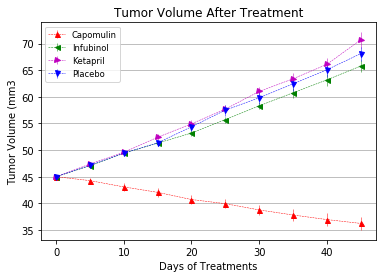

In [20]:
# graph tumor volume size after treatment with error bars of requested drugs and placebo
plt.errorbar(avg_tumor_vol_pv.index, avg_tumor_vol_pv["Capomulin"], yerr=se_avg_tumor_vol_pv["Capomulin"], color="r", marker="^", markersize=5,linestyle="dashed", linewidth=0.50)
plt.errorbar(avg_tumor_vol_pv.index, avg_tumor_vol_pv["Infubinol"], yerr=se_avg_tumor_vol_pv["Infubinol"], color="g", marker="<", markersize=5,linestyle="dashed", linewidth=0.50)
plt.errorbar(avg_tumor_vol_pv.index, avg_tumor_vol_pv["Ketapril"], yerr=se_avg_tumor_vol_pv["Ketapril"], color="m", marker=">", markersize=5,linestyle="dashed", linewidth=0.50)
plt.errorbar(avg_tumor_vol_pv.index, avg_tumor_vol_pv["Placebo"], yerr=se_avg_tumor_vol_pv["Placebo"], color="b", marker="v", markersize=5,linestyle="dashed", linewidth=0.50)

plt.title("Tumor Volume After Treatment")
plt.ylabel("Tumor Volume (mm3"))
plt.xlabel("Days of Treatments")
plt.grid(axis="y")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="upperleft", fontsize="small")

plt.show()

In [21]:
merged_file.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [22]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
meta_site_gr = merged_file.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
meta_site_gr.head(15)

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
           25           0.818182
           30           1.090909
           35           1.181818
           40           1.380952
           45           1.476190
Ceftamin   0            0.000000
           5            0.380952
           10           0.600000
           15           0.789474
           20           1.111111
Name: Metastatic Sites, dtype: float64

In [23]:
# Convert to DataFrame
meta_response = pd.DataFrame(meta_site_gr)

In [24]:
# reset index
meta_response = meta_response.reset_index(inplace=False)

# Preview DataFrame
meta_response

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [25]:
meta_response_pv = meta_response.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
meta_response_pv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [26]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_meta_site_gr = merged_file.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
se_meta_site_gr.head(15)

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
           25           0.181818
           30           0.172944
           35           0.169496
           40           0.175610
           45           0.202591
Ceftamin   0            0.000000
           5            0.108588
           10           0.152177
           15           0.180625
           20           0.241034
Name: Metastatic Sites, dtype: float64

In [27]:
# Convert to DataFrame
se_meta_response = pd.DataFrame(se_meta_site_gr)

In [28]:
# reset index
se_meta_response = se_meta_response.reset_index(inplace=False)

# Preview DataFrame
se_meta_response

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [29]:
se_meta_response_pv = meta_response.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
se_meta_response_pv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [30]:
# Need to convert to metastatic rate??????

In [77]:
merged_file.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [78]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_surv_gr = merged_file.groupby(['Drug', 'Timepoint'])['Mouse ID'].apply(len)
mice_surv_gr.head(15)

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
           25           22
           30           22
           35           22
           40           21
           45           21
Ceftamin   0            25
           5            21
           10           20
           15           19
           20           18
Name: Mouse ID, dtype: int64

In [79]:
# Convert to DataFrame
surv_rate = pd.DataFrame(mice_surv_gr)

In [80]:
# reset index
surv_rate = surv_rate.reset_index(inplace=False)

# Preview DataFrame
surv_rate

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [81]:
surv_rate_pv = surv_rate.pivot(index="Timepoint", columns="Drug")["Mouse ID"]
surv_rate_pv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [82]:
# reformat needed columns to show survival rate percentage
surv_rate_pv['Capomulin'] = pd.Series(["{0:.2f}%".format((val/25) * 100) for val in surv_rate_pv['Capomulin']], index = surv_rate_pv.index)
surv_rate_pv['Infubinol'] = pd.Series(["{0:.2f}%".format((val/25) * 100) for val in surv_rate_pv['Infubinol']], index = surv_rate_pv.index)
surv_rate_pv['Ketapril'] = pd.Series(["{0:.2f}%".format((val/25) * 100) for val in surv_rate_pv['Ketapril']], index = surv_rate_pv.index)
surv_rate_pv['Placebo'] = pd.Series(["{0:.2f}%".format((val/25) * 100) for val in surv_rate_pv['Placebo']], index = surv_rate_pv.index)
surv_rate_pv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.00%,25,100.00%,100.00%,25,100.00%,26,25,26,25
5,100.00%,21,100.00%,92.00%,23,96.00%,25,25,25,24
10,100.00%,20,84.00%,88.00%,21,96.00%,23,24,23,22
15,96.00%,19,84.00%,76.00%,21,80.00%,17,24,23,21
20,92.00%,18,80.00%,76.00%,20,76.00%,17,23,21,17
25,88.00%,18,72.00%,76.00%,18,68.00%,14,23,19,16
30,88.00%,16,68.00%,72.00%,15,60.00%,13,23,18,15
35,88.00%,14,48.00%,68.00%,15,56.00%,10,21,16,14
40,84.00%,14,40.00%,60.00%,15,48.00%,9,20,12,14


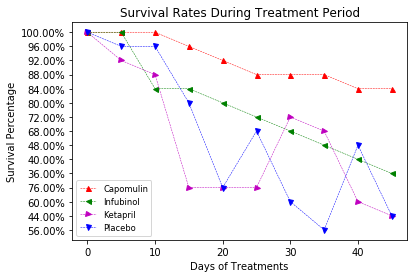

In [83]:
# plot graph for survival rate percentages
plt.errorbar(surv_rate_pv.index, surv_rate_pv["Capomulin"], color="r", marker="^", markersize=5,linestyle="dashed", linewidth=0.50)
plt.errorbar(surv_rate_pv.index, surv_rate_pv["Infubinol"], color="g", marker="<", markersize=5,linestyle="dashed", linewidth=0.50)
plt.errorbar(surv_rate_pv.index, surv_rate_pv["Ketapril"], color="m", marker=">", markersize=5,linestyle="dashed", linewidth=0.50)
plt.errorbar(surv_rate_pv.index, surv_rate_pv["Placebo"], color="b", marker="v", markersize=5,linestyle="dashed", linewidth=0.50)

plt.title("Survival Rates During Treatment Period")
plt.ylabel("Survival Percentage")
plt.xlabel("Days of Treatments")
#plt.grid(axis="y")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="upperleft", fontsize="small")
plt.gca().invert_yaxis()

# Save the Figure

# Show the Figure
plt.show()

In [38]:
avg_tumor_vol.head(15)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [39]:
#avg_tumor_vol.iloc[avg_tumor_vol["Timepoint"] == "0", ["Tumor Volume (mm3)"]]
#avg_tumor_vol.iloc[avg_tumor_vol["Timepoint"] == "45", ["Tumor Volume (mm3)"]]

In [40]:
(0-9) / 0

ZeroDivisionError: division by zero

In [ ]:
# set open lists
drug = []
begin_vol = []
end_vol = []

In [ ]:
for drug in avg_tumor_vol["Drug"]:
    drug.append(drug)
    